In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/prove_DSNL_keras/
from data_prep import data_loader
import numpy as np

data_X, data_y = data_loader(raw=True)

Mounted at /content/drive
/content/drive/MyDrive/prove_DSNL_keras


In [39]:
from data_prep import data_loader
import numpy as np

X_train, X_valid, y_train, y_valid = data_loader()

In [2]:
X_seq = np.transpose(np.asarray(data_X[0][0]))
y_seq = [data_y[0][0]]
for i in range(1, len(data_X)):
    for j in range(1, len(data_X[i])): 
        X_seq = np.concatenate((X_seq,np.transpose(np.asarray(data_X[i][j]))), axis=0)
        y_seq.append(data_y[i][j])

In [3]:
y_seq = np.asarray(y_seq)

In [4]:
import pandas as pd
zipped = list(zip(X_seq, y_seq))
data = pd.DataFrame(zipped, columns=['signal','label'])


In [7]:
data["label"].value_counts()

2    17549
0     8060
4     7592
3     5483
1     2746
Name: label, dtype: int64

In [15]:
WAKE = data[data["label"] == 0]
WAKE = WAKE["signal"]
WAKE_mean = WAKE.mean()

N1 = data[data["label"] == 1]
N1 = N1["signal"]
N1_mean = N1.mean()

N2 = data[data["label"] == 2]
N2 = N2["signal"]
N2_mean = N2.mean()

N34 = data[data["label"] == 3]
N34 = N34["signal"]
N34_mean = N34.mean()

REM = data[data["label"] == 4]
REM = REM["signal"]
REM_mean = REM.mean()

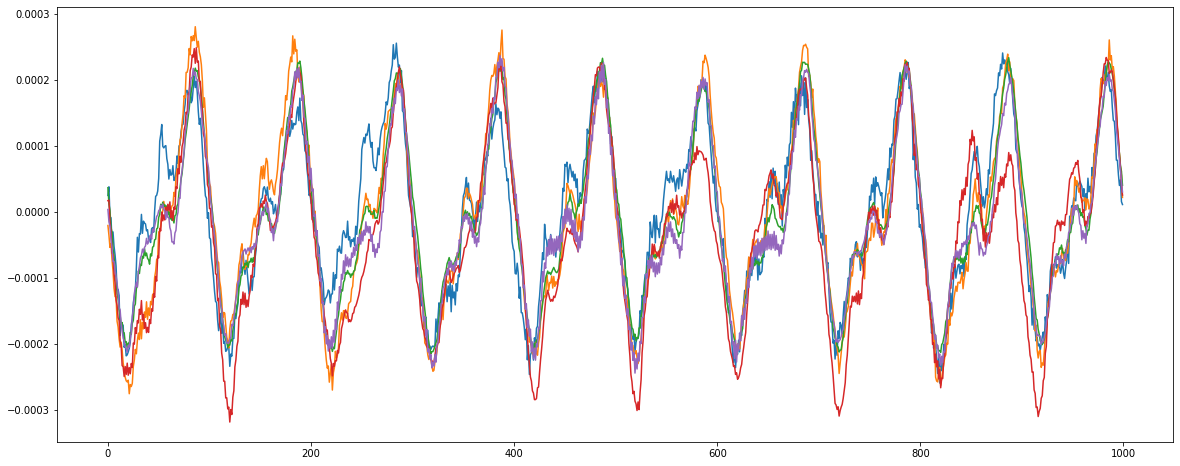

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))
plt.plot(WAKE_mean[:1000])
plt.plot(N1_mean[:1000])
plt.plot(N2_mean[:1000])
plt.plot(N34_mean[:1000])
plt.plot(REM_mean[:1000])

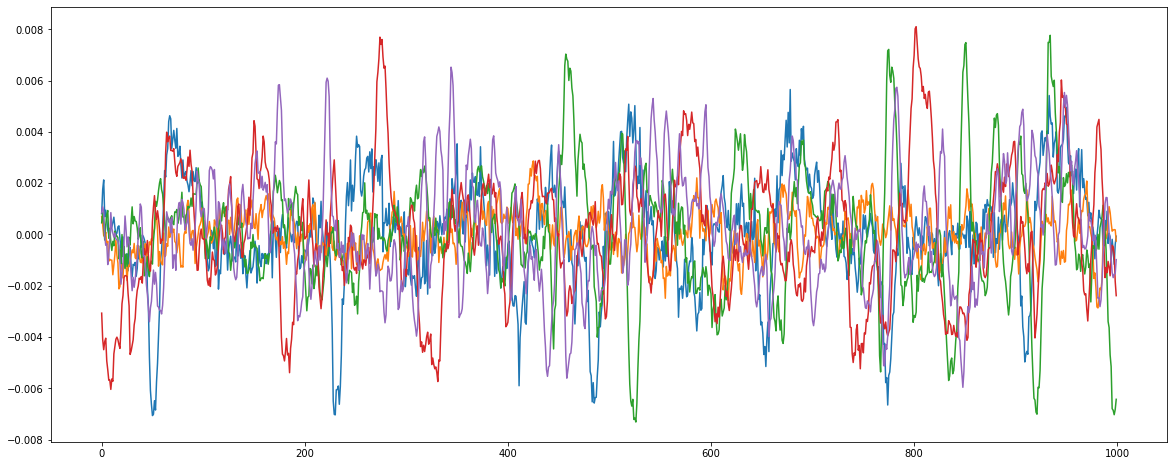

In [33]:
fig = plt.figure(figsize=(20,8))
plt.plot(WAKE.iloc[0][:1000])
plt.plot(N1.iloc[0][:1000])
plt.plot(N2.iloc[0][:1000])
plt.plot(N34.iloc[0][:1000])
plt.plot(REM.iloc[0][:1000])

In [38]:
%pip install antropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.3 MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16159 sha256=dfe990af135e2dbce5cf8f8ac498d487c0eb5bd33cca8625ac454a5fb315e744
  Stored in directory: /root/.cache/pip/wheels/d4/cc/6b/28fa7036bdabc6f1f92fd6a108ae259dbb48f107f676d6b491
Successfully built antropy


In [43]:
import antropy as ant

#approximate entropy mean
print(f'app entropy wake {ant.app_entropy(WAKE_mean)}')
print(f'app entropy n1 {ant.app_entropy(N1_mean)}')
print(f'app entropy n2 {ant.app_entropy(N2_mean)}')
print(f'app entropy n34 {ant.app_entropy(N34_mean)}')
print(f'app entropy rem {ant.app_entropy(REM_mean)}')

app_en_wake = []
for el in WAKE:
  app_en_wake.append(ant.app_entropy(el))

app_en_n1 = []
for el in N1:
  app_en_n1.append(ant.app_entropy(el))

app_en_n2 = []
for el in N2:
  app_en_n2.append(ant.app_entropy(el))

app_en_n34 = []
for el in N34:
  app_en_n34.append(ant.app_entropy(el))

app_en_rem = []
for el in REM:
  app_en_rem.append(ant.app_entropy(el))

app entropy wake 0.5849215960795728
app entropy n1 0.451365239087246
app entropy n2 0.3619553939296192
app entropy n34 0.4377520554187253
app entropy rem 0.41446330772996776


In [45]:
app_en_wake = np.asarray(app_en_wake)
app_en_n1 = np.asarray(app_en_n1)
app_en_n2 = np.asarray(app_en_n2)
app_en_n34 = np.asarray(app_en_n34)
app_en_rem = np.asarray(app_en_rem)

In [46]:
print(f'app entropy wake {app_en_wake.mean()}')
print(f'app entropy n1 {app_en_n1.mean()}')
print(f'app entropy n2 {app_en_n2.mean()}')
print(f'app entropy n34 {app_en_n34.mean()}')
print(f'app entropy rem {app_en_rem.mean()}')

app entropy wake 1.1746231710399881
app entropy n1 1.2498513597864573
app entropy n2 0.9998614508228862
app entropy n34 0.6499828829323789
app entropy rem 1.1573404958385731
